In [1]:
# Prerequisites: install qiskit
!pip3 install --user qiskit pylatexenc matplotlib
# Configure qiskit to draw with matplotlib
!mkdir -p ~/.qiskit
!printf '[default]\ncircuit_drawer=mpl\n' >~/.qiskit/settings.conf

In [2]:
from math import pi
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
%matplotlib inline

# Creating Circuits

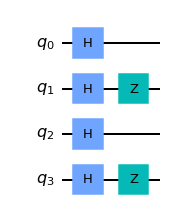

In [3]:
n = 4
qc = QuantumCircuit(n)
qc.h(range(n))
qc.z([1,3])
qc.draw()

# Useful Visualizations

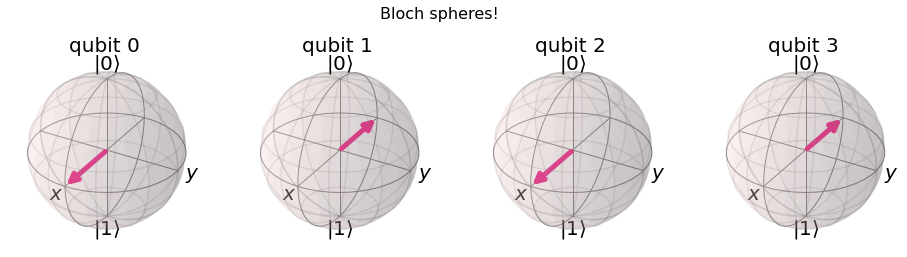

In [4]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title="Bloch spheres!")

# Circuit Optimizations

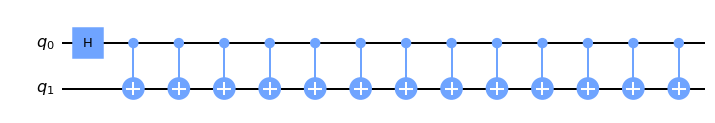

In [5]:
redundant_circ = QuantumCircuit(2)
redundant_circ.h(0)
for i in range(13):
    redundant_circ.cnot(0, 1)
redundant_circ.draw()

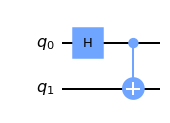

In [6]:
opt_circ = transpile(redundant_circ, optimization_level=2)
opt_circ.draw()

# Simulation

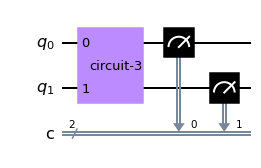

In [7]:
opt_circ_with_meas = QuantumCircuit(2, 2)
opt_circ_with_meas.append(opt_circ.to_instruction(), qargs=range(2))
opt_circ_with_meas.measure(range(2), range(2))
opt_circ_with_meas.draw()

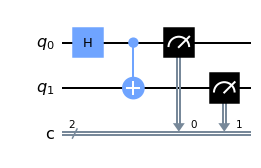

In [8]:
opt_circ_with_meas = opt_circ_with_meas.decompose()
opt_circ_with_meas.draw()

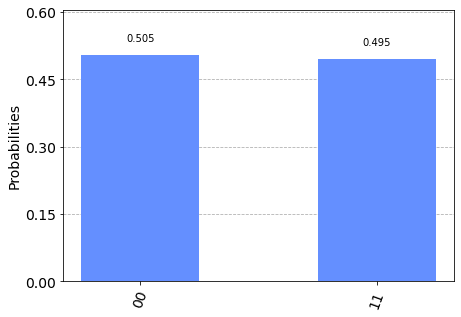

In [9]:
qobj = assemble(opt_circ_with_meas)
result = Aer.get_backend('aer_simulator').run(qobj, shots=8192).result()
plot_histogram(result.get_counts())

# Execution on IBM™® Hardware

In [10]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

**Note:** The below line (`IBMQ.load_account()`) may fail until you run `IBMQ.save_account(TOKEN)` to save your authentication token to disk ([documentation link](https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq#the-account))

In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

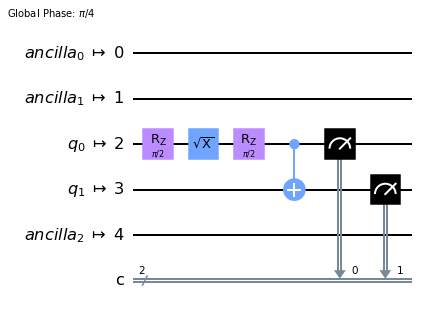

In [88]:
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 2 and 
                                      not x.configuration().simulator and x.status().operational==True))
transpiled_circ = transpile(opt_circ_with_meas, device, optimization_level=3)
transpiled_circ.draw()

In [90]:
job = device.run(transpiled_circ)
job_monitor(job, interval=2)

Job Status: job has successfully run


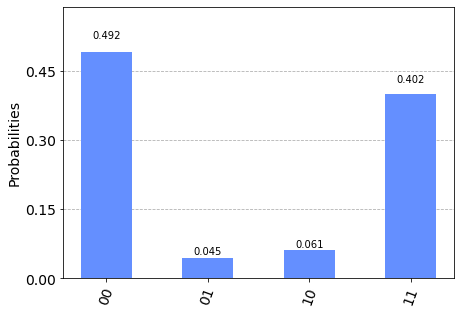

In [93]:
plot_histogram(job.result().get_counts())